## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/python_stat_sample-master/data/ch2_scores_em.csv", index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
import numpy as np

scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [4]:
scores_df = pd.DataFrame({'scores' : scores},
                          index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                           name = 'student'))
scores_df

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 2.1 데이터 중심의 지표, 대푯값

### 2.1.1 평균값

In [5]:
print(sum(scores) / len(scores))
print(np.mean(scores))
print(scores.mean())

55.0
55.0
55.0


### 2.1.2 중앙값

In [6]:
# 영어 점수의 중앙값구하기
# 먼저 크기순으로 정렬하기
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [7]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) /2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [8]:
print(np.median(scores))
print(scores_df.median())

56.5
scores    56.5
dtype: float64


### 2.1.3 최빈값

In [9]:
pd.Series([1, 1, 2, 3, 4, 1, 1]).mode()

0    1
dtype: int64

## 2.2 데이터의 산포도 지표

### 2.2.1 분산과 표준편차

- 편차

In [10]:
# 편차
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
print('scores :', scores)
print('평균 :', mean)
print('편차 :', deviation)

scores : [42 69 56 41 57 48 65 49 65 58]
평균 : 55.0
편차 : [-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [12]:
np.mean(deviation)

0.0

In [13]:
summary = scores_df.copy()
summary['deviation'] = deviation
summary

,scores,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


- 분산

In [14]:
# 분산
np.mean(deviation ** 2) # 86.0
np.var(scores) # 86.0
scores_df.var(ddof=0) # 86.0

scores    86.0
dtype: float64

In [15]:
summary['square of deviation'] = np.square(deviation)
summary

,scores,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


- 표준편차

In [16]:
np.sqrt(np.var(scores, ddof=0))
np.std(scores, ddof=0)

9.273618495495704

### 범위와 사분위 범위

- 범위(range)

In [17]:
np.max(scores) - np.min(scores)

28

- 사분위 범위(interquartile range)
    - IQR = Q3 - Q1

In [18]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [19]:
scores_Q1 = scores_df.quantile(0.25)
scores_Q3 = scores_df.quantile(0.75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

scores    15.0
dtype: float64

### 2.2.3 데이터의 지표 정리

In [20]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [21]:
scores_df.describe()

,scores
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


## 2.3 데이터의 정규화

### 2.3.1 표준화(standardization)

In [22]:
%precision 3

'%.3f'

In [23]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [24]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 2.3.2 편찻값
- 평균이 50, 표준편차가 10이 되도록 정규화

In [25]:
z = 50 + 10*((scores - np.mean(scores)) / np.std(scores))
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [26]:
scores_df['deviation value'] = z
scores_df

,scores,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


## 2.4 1차원 데이터의 시각화

In [27]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 2.4.1 도수분포표

- 계급과 도수

In [28]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [29]:
# 0~10, 10~20, ... 이라는 문자열 리스트 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class을 인덱스로 DataFrame 작성
freq_dist_df = pd.DataFrame({'frequency': freq},
                            index = pd.Index(freq_class,
                                             name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


- 계급값 : 각 계급의 중앙값

In [30]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

- 상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지를 나타냄

In [31]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

- 누적상대도수 : 해당 계급까지의 상대도수의 합

In [32]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [33]:
# 도수분포표에 내용 추가하기
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


- 최빈값 : 최대가 되는 계급의 계급값

In [34]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 2.4.2 히스토그램

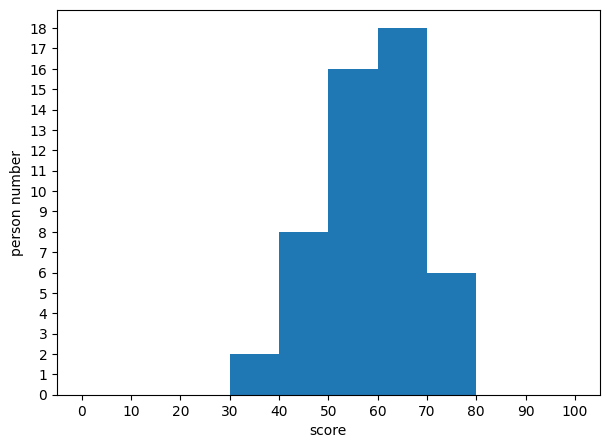

In [38]:
import matplotlib.pyplot as plt

# 그래프가 jupyter notebook에 표시되도록 함
%matplotlib inline

# 그래프의 크기(가로, 세로)를 설정합니다.
fig = plt.figure(figsize=(7, 5))
# 인수는 영역을 1X1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램 그리기
freq, _, _ = ax.hist(english_scores, bins = 10, range = (0, 100))
# x, y축에 레이블 부여
ax.set_xlabel('score')
ax.set_ylabel('person number')

# x, y축에 눈금 표시
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

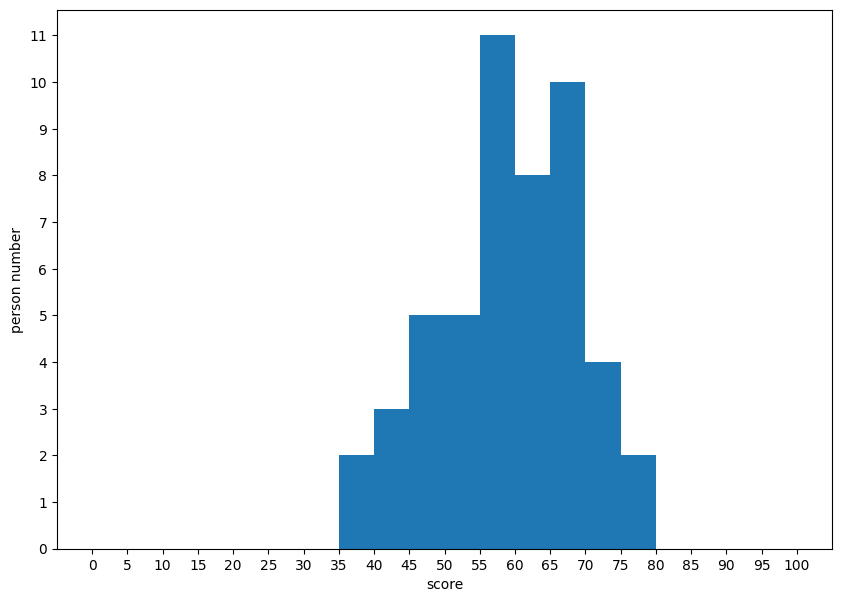

In [42]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins = 20, range = (0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0, 100, 20+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

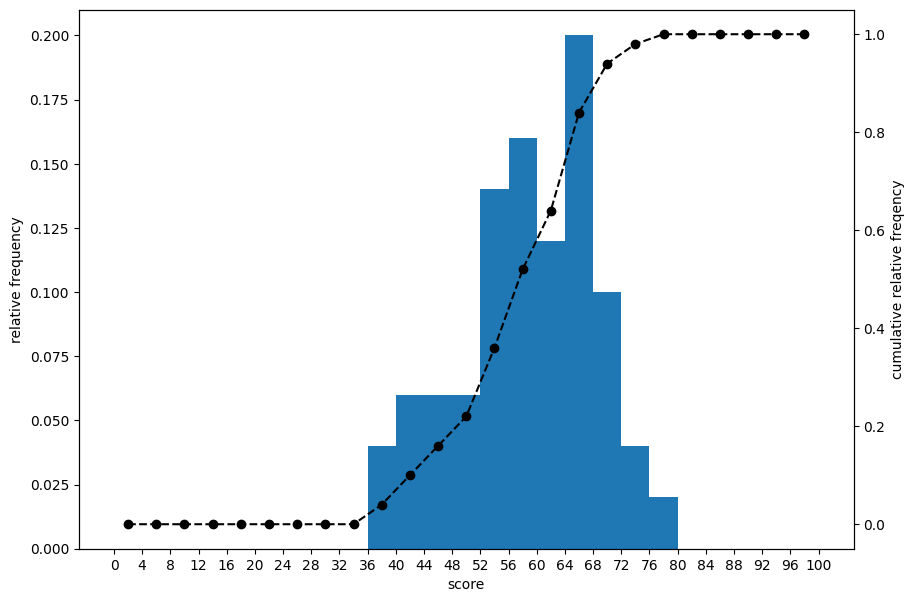

In [45]:
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(111)

# y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins = 25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i + (i+4))//2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
ax2.plot(class_value, cum_rel_freq, ls = '--', marker = 'o', color = 'black')

# 꺾은선 그래프의 눈금선 제거
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative freqency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 2.4.3 상자그림

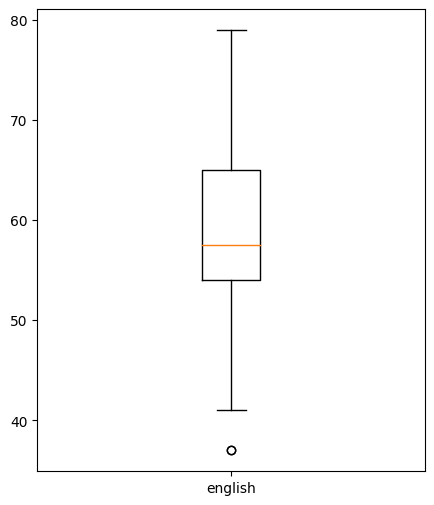

In [47]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()